In [36]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay

In [38]:
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2024-11-23 22:28:30.343346

NumPy version: 1.26.4
pandas version: 2.1.4
matplotlib version: 3.8.0
Scikit-Learn version: 1.2.2


## Loading Data


In [39]:
df=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Data Exploration 

In [40]:
df.shape

(303, 14)

In [41]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [42]:
df.target.value_counts(normalize=True) # tinh toan ty le phan tram cac gia tri trong cot

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

<Axes: xlabel='target'>

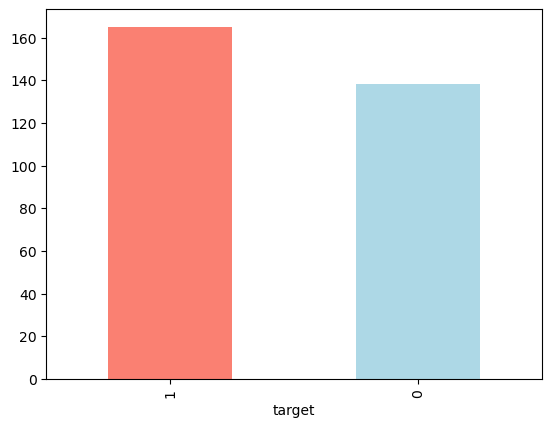

In [43]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [46]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [47]:
pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

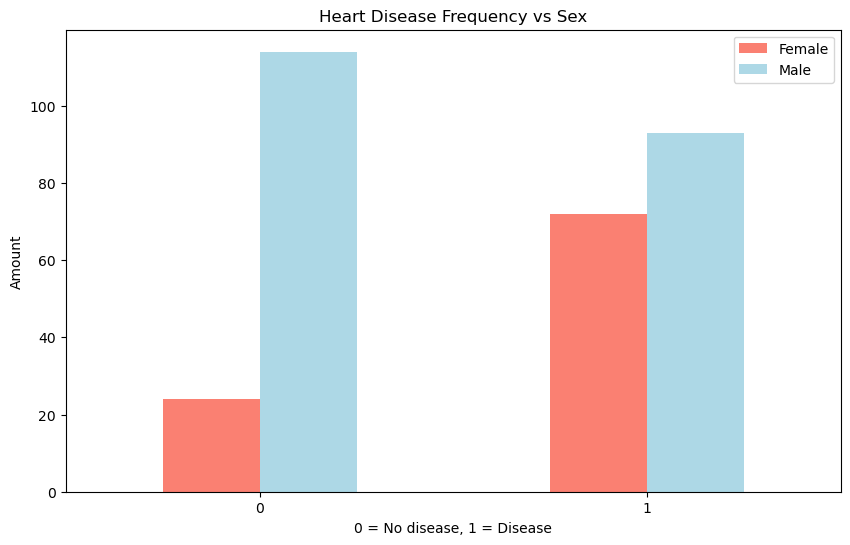

In [48]:
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

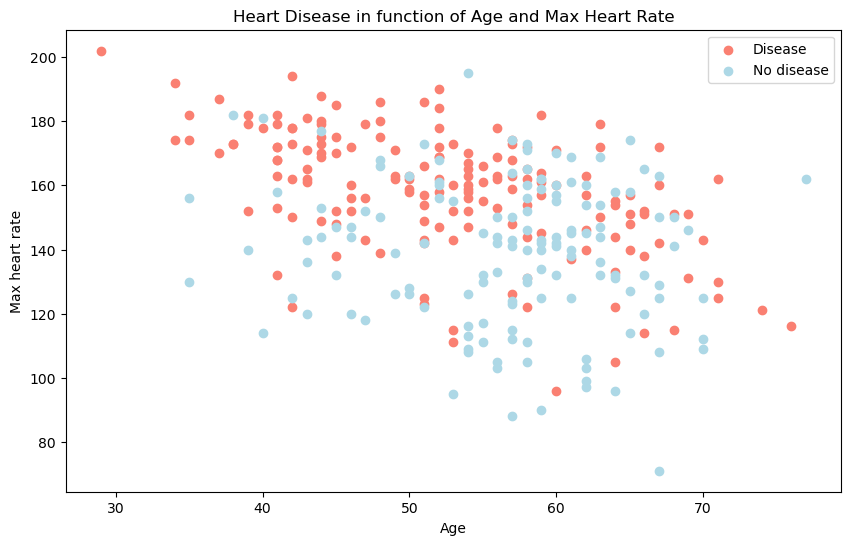

In [49]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No disease"])

<Axes: ylabel='Frequency'>

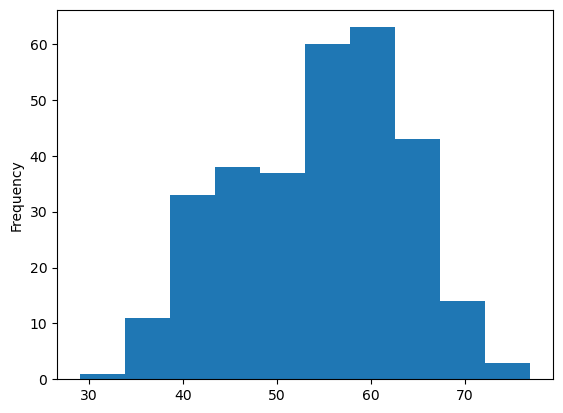

In [50]:
df.age.plot.hist()

In [51]:
pd.crosstab(index=df.cp, columns=df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


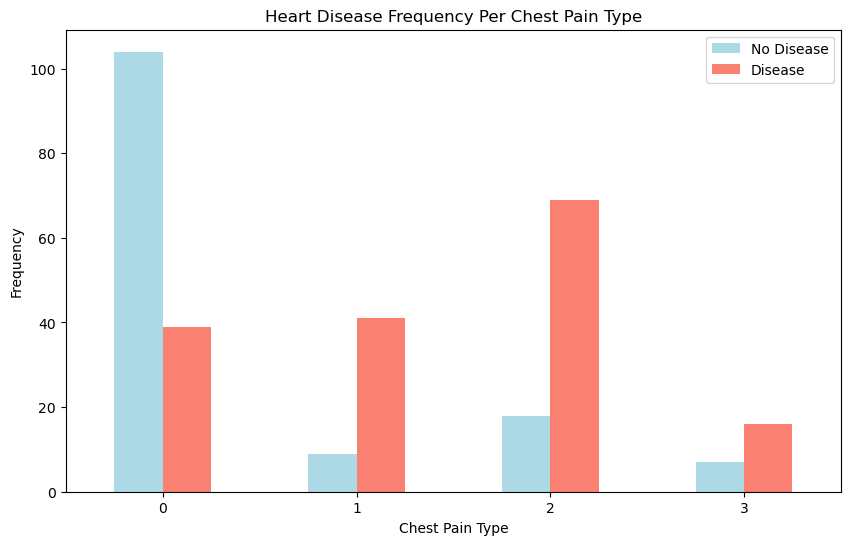

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(10,6),color=["lightblue", "salmon"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

In [53]:
corr_matrix = df.corr() ## ma trận tương quan tìm mối quan hệ giữa các biến
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

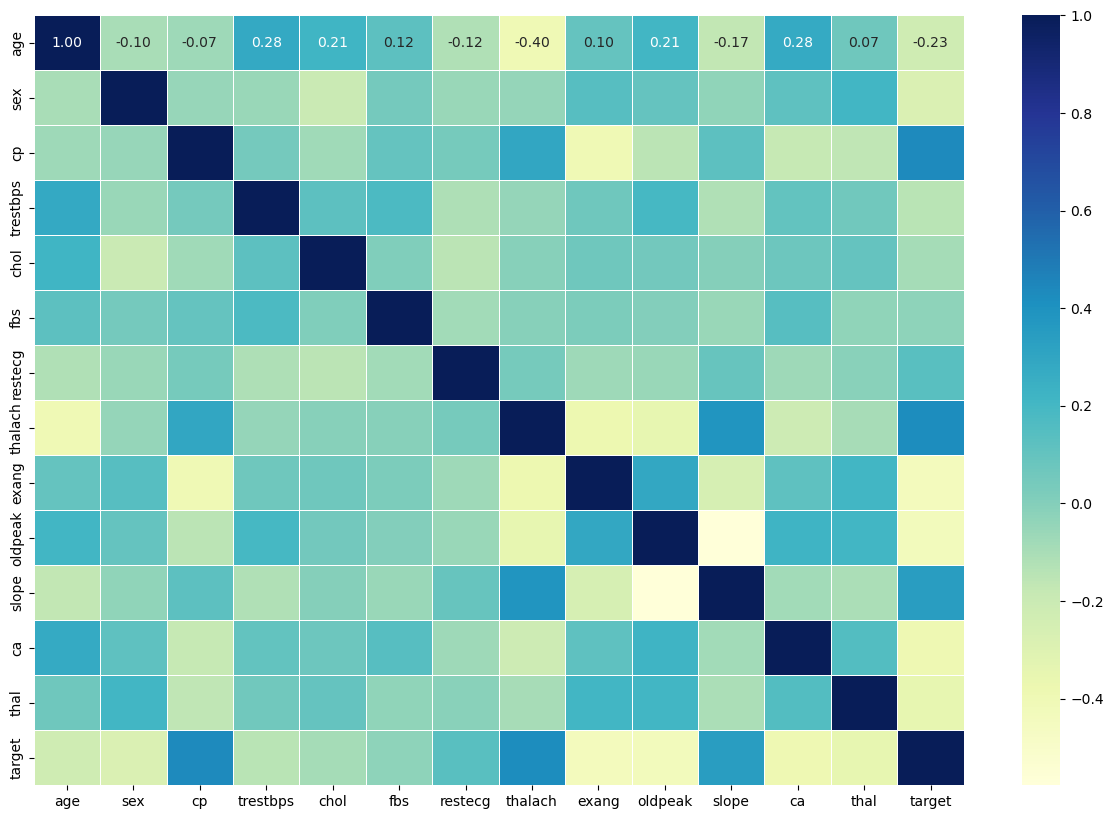

In [58]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")


In [57]:
import seaborn as sns
import matplotlib
print(sns.__version__)
print(matplotlib.__version__)


0.12.2
3.8.0


## Modeling


In [59]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [60]:
X=df.drop(labels="target",axis=1)

y=df.target.to_numpy()

In [61]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [62]:
y,type(y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [63]:
np.random.seed(42)

## tách dữ liệu ban đầu thành 2 tập kiểm tra và training
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [66]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [67]:
y_train,len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

In [68]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [69]:
y_test,len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 61)

In [70]:
models={"KNN":KNeighborsClassifier(),
       "Logistic Regression":LogisticRegression(max_iter=100),
       "Random Forest":RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
  np.random.seed(42)
  model_scores={}

  for name,model in models.items():
    model.fit(X_train,y_train)
    model_scores[name]=model.score(X_test,y_test)
  return model_scores

In [71]:
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

(array([0, 1, 2]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'Random Forest')])

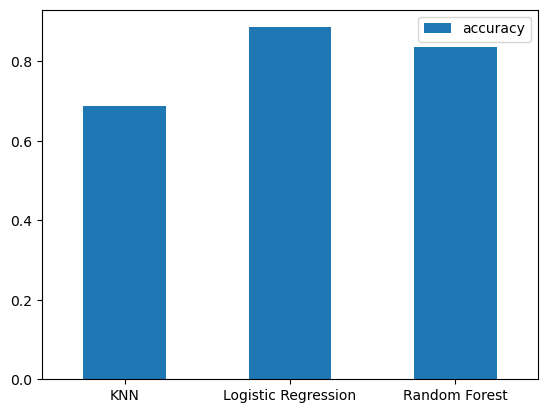

In [75]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation = 0)

In [78]:
train_scores=[]

test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train,y_train)
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [79]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


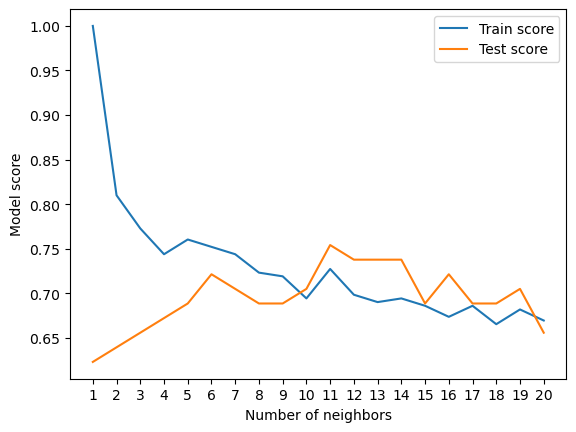

In [81]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [95]:
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}

rf_grid={"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
%%time

np.random.seed(42)
#Thiết lập cho bộ sinh ngẫu nhiên của NUmpy đảm bảo tính tái lập(kết quả giống nhau khi chạy lại)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),# randomizedsearch là 1 công cụ tìm kiếm siêu tham số 1 cách ngẫu nhiên
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 516 ms
Wall time: 1.05 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [98]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test, y_test) 
#Lúc này thì rs_log_reg là phiên bản tốt nhất của mô hình Logistic Regression 

0.8852459016393442

In [101]:
%%time 

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1min 44s
Wall time: 2min 59s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [102]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [103]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [104]:
%%time

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 438 ms
Wall time: 1.07 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [105]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [106]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
%%time

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train)

In [107]:
y_preds = gs_log_reg.predict(X_test)

In [108]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [109]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

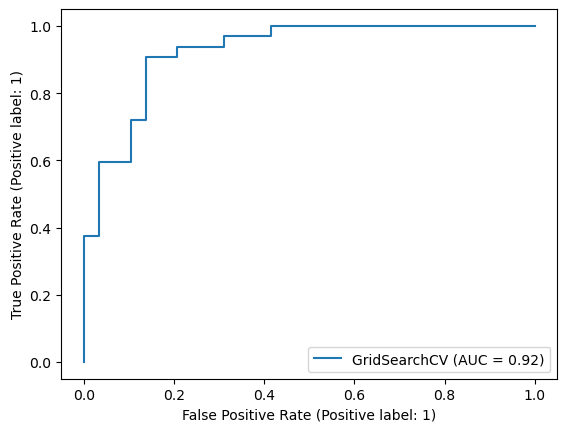

In [ ]:
from sklearn.metrics import RocCurveDisplay 

RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

In [ ]:
# AUC (Area Under the Curve) = 0.92:

# AUC là diện tích dưới đường cong ROC và cho biết khả năng phân biệt giữa các lớp của mô hình.
# AUC = 0.92 cho thấy mô hình của bạn có khả năng phân biệt tốt giữa lớp dương tính (bệnh tim) và lớp âm tính (không bệnh tim). Giá trị AUC gần 1.0 cho thấy mô hình rất mạnh trong việc phân loại đúng.
# Tỷ lệ dương tính thực (True Positive Rate - TPR):

# TPR cao gần 1 cho thấy mô hình đã nhận diện chính xác hầu hết các bệnh nhân mắc bệnh tim (true positives).
# Tỷ lệ âm tính giả (False Positive Rate - FPR):

# FPR thấp, có nghĩa là mô hình không đưa ra quá nhiều dự đoán sai (false positives), tức là không chẩn đoán sai quá nhiều bệnh nhân khỏe mạnh là mắc bệnh.
# Chất lượng mô hình:

# Vì mô hình có AUC cao (0.92), điều này chứng tỏ mô hình của bạn hoạt động khá tốt. Bạn có thể tin tưởng vào khả năng phân biệt của nó trong các tình huống phân loại thực tế.
# Tóm lại, mô hình của bạn đang có một hiệu suất rất tốt, với AUC cao và một ROC curve cho thấy khả năng phân biệt mạnh mẽ giữa các lớp.

In [111]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


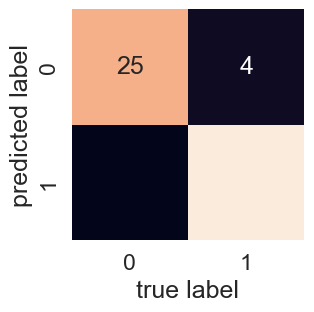

In [112]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [113]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [114]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [117]:

from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [118]:
# Điểm F1 với cross-validation
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,  # 5-fold cross-validation
                        scoring="f1")  # Sử dụng F1 score làm chỉ số đánh giá
cv_f1


array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [120]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Tạo mô hình với các siêu tham số tối ưu
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")

# Tính điểm Precision trung bình từ cross-validation
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
average_precision = cv_precision.mean()
print(f"Precision trung bình: {average_precision:.4f}")

# Tính điểm Recall trung bình từ cross-validation
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
average_recall = cv_recall.mean()
print(f"Recall trung bình: {average_recall:.4f}")

# Tính điểm F1-score trung bình từ cross-validation
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
average_f1 = cv_f1.mean()
print(f"F1-score trung bình: {average_f1:.4f}")

# Tính điểm Accuracy trung bình từ cross-validation
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
average_acc = cv_acc.mean()
print(f"Accuracy trung bình: {average_acc:.4f}")


Precision trung bình: 0.8216
Recall trung bình: 0.9273
F1-score trung bình: 0.8705
Accuracy trung bình: 0.8480


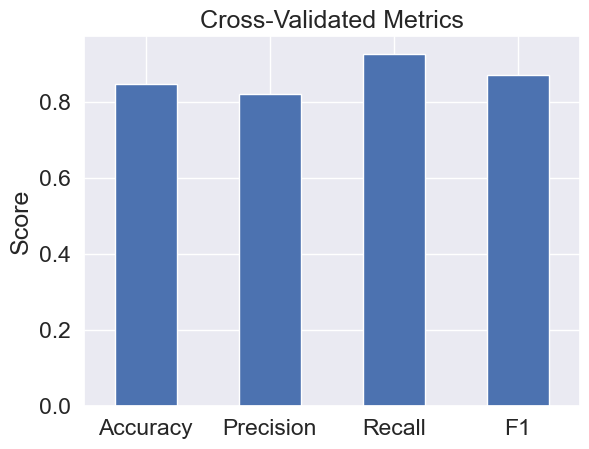

In [126]:
# Tạo mô hình với các siêu tham số tối ưu
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")

# Tính điểm Precision trung bình từ cross-validation
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
average_precision = cv_precision.mean()

# Tính điểm Recall trung bình từ cross-validation
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
average_recall = cv_recall.mean()

# Tính điểm F1-score trung bình từ cross-validation
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
average_f1 = cv_f1.mean()

# Tính điểm Accuracy trung bình từ cross-validation
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
average_acc = cv_acc.mean()

# Tạo DataFrame chứa các chỉ số trung bình
cv_metrics = pd.DataFrame({
    "Accuracy": [average_acc],
    "Precision": [average_precision],
    "Recall": [average_recall],
    "F1": [average_f1]
})

# Vẽ biểu đồ cột cho các chỉ số
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False)
plt.ylabel('Score')
plt.xticks(rotation = 0)
plt.show()


In [127]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [128]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490195,  0.02472938, -0.63120405, -0.57590942,
         0.47095136, -0.65165348, -0.69984206]])

In [129]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220351664148,
 'sex': -0.9042408930260735,
 'cp': 0.6747282624694215,
 'trestbps': -0.011613401789010375,
 'chol': -0.0017036441780094993,
 'fbs': 0.047876883382302414,
 'restecg': 0.3349019539205334,
 'thalach': 0.024729383396378347,
 'exang': -0.6312040510578483,
 'oldpeak': -0.5759094230155162,
 'slope': 0.47095135616471195,
 'ca': -0.6516534832909596,
 'thal': -0.6998420628111434}

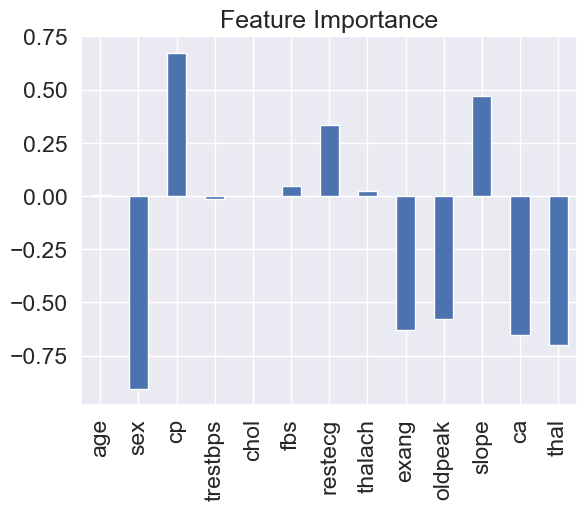

In [130]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [132]:
# Sắp xếp các đặc trưng theo giá trị tuyệt đối của hệ số
sorted_features = sorted(features_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Lấy top 5 đặc trưng quan trọng nhất
top_5_features = sorted_features[:5]

# In ra top 5 đặc trưng quan trọng nhất
for feature, importance in top_5_features:
    print(f'{feature}: {importance}')


sex: -0.9042408930260735
thal: -0.6998420628111434
cp: 0.6747282624694215
ca: -0.6516534832909596
exang: -0.6312040510578483


In [131]:
import joblib

# Lưu mô hình đã huấn luyện vào file
joblib.dump(clf, 'heart_disease_model.pkl')


['heart_disease_model.pkl']